In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
import numpy as np

In [ ]:
models = []
Accuracy_score = []
precision = []
recall = []
f1Score = []

In [ ]:
data = pd.read_csv('heart_attack.csv')

In [ ]:
data.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age,Education,Income
0,0,1,1,1,40.0,1,0,0,0,0,18,15,0,9,4,3
1,0,0,0,0,25.0,1,0,0,1,0,0,0,0,7,6,1
2,0,1,1,1,28.0,0,0,0,0,0,30,30,0,9,4,8
3,0,1,0,1,27.0,0,0,0,1,0,0,0,0,11,3,6
4,0,1,1,1,24.0,0,0,0,1,0,3,0,0,11,5,4


In [ ]:
data.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'HvyAlcoholConsump',
       'MentHlth', 'PhysHlth', 'Sex', 'Age', 'Education', 'Income'],
      dtype='object')

Check for outliers, After checking say that because they were very small you dropped them.

In [ ]:
data.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age,Education,Income
count,129998.000000,129998.000000,129998.000000,129998.000000,129988.000000,129998.000000,129998.000000,129998.000000,129998.000000,129998.000000,129998.000000,129998.000000,129998.000000,129998.000000,129998.000000,129998.000000
mean,0.093509,0.429614,0.426322,0.963315,28.435586,0.448030,0.041354,0.296689,0.760758,0.057562,3.159718,4.222942,0.439214,8.056624,5.078670,6.098894
std,0.291146,0.495023,0.494544,0.187988,6.999582,0.497294,0.199110,0.697608,0.426622,0.232915,7.344179,8.689544,0.496293,3.048218,0.977537,2.057443
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2.000000,3.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,30.000000,30.000000,1.000000,13.000000,6.000000,8.000000


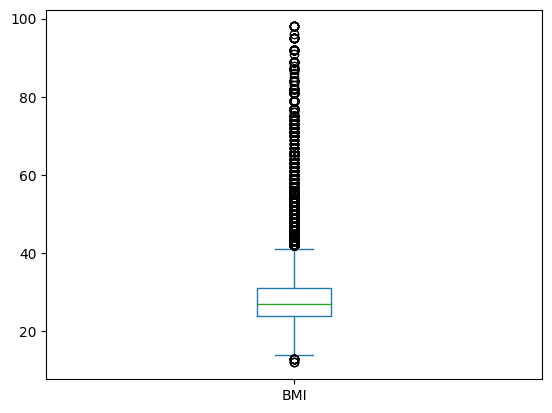

In [ ]:
data['BMI'].plot(kind='box')
plt.savefig('BMIBeforeBP.png', dpi=300)

In [ ]:
attribute_name = 'BMI'

# Calculate the IQR for the attribute
Q1 = data[attribute_name].quantile(0.25)
Q3 = data[attribute_name].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = data[(data[attribute_name] < lower_bound) | (data[attribute_name] > upper_bound)]

# Print the number of outliers
print(f"Number of outliers in '{attribute_name}': {len(outliers)}")

# Number of records
print("Number of Records:", data.shape[0])

Number of outliers in 'BMI': 5303
Number of Records: 129998


since the number of outliers is less than 4% they will be dropped.

In [ ]:
attribute_name = 'BMI'

# Calculate the IQR for the attribute
Q1 = data[attribute_name].quantile(0.25)
Q3 = data[attribute_name].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = data[(data[attribute_name] < lower_bound) | (data[attribute_name] > upper_bound)]

# Drop outliers from the DataFrame
data = data.drop(outliers.index)

# Print the number of outliers dropped
print(f"Number of outliers dropped '{attribute_name}': {len(outliers)}")

# Check the shape of the cleaned DataFrame
print("Shape of cleaned DataFrame:", data.shape)

Number of outliers dropped 'BMI': 5303
Shape of cleaned DataFrame: (124695, 16)


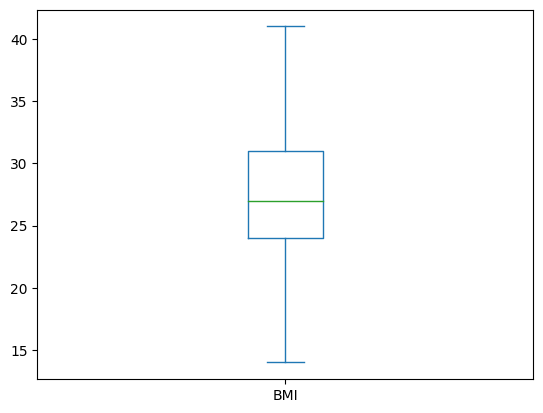

In [ ]:
data['BMI'].plot(kind='box')
plt.savefig('BMIAfterBP.png', dpi=300)

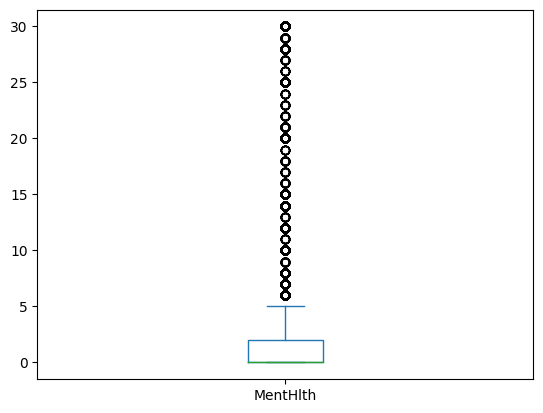

In [ ]:
data['MentHlth'].plot(kind='box')
plt.savefig('MentHlthBeforeBP.png', dpi=300)

In [ ]:
attribute_name = 'MentHlth'

# Calculate the IQR for the attribute
Q1 = data[attribute_name].quantile(0.25)
Q3 = data[attribute_name].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = data[(data[attribute_name] < lower_bound) | (data[attribute_name] > upper_bound)]

# Print the number of outliers
print(f"Number of outliers in '{attribute_name}': {len(outliers)}")

# Number of records
print("Number of Records:", data.shape)

Number of outliers in 'MentHlth': 17071
Number of Records: (124695, 16)


In [ ]:
attribute_name = 'MentHlth'
capping_value = 5  # Value to cap outliers

# Calculate the IQR for the attribute
Q1 = data[attribute_name].quantile(0.25)
Q3 = data[attribute_name].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers instead of dropping them
data[attribute_name] = data[attribute_name].clip(lower=lower_bound, upper=upper_bound)

# Replace values exceeding the upper bound with capping_value
data.loc[data[attribute_name] > upper_bound, attribute_name] = capping_value

# Print the number of outliers
print(f"Number of outliers capped in '{attribute_name}': {len(outliers)}")

# Check the Number of Records
print("Number of Records:", data.shape)

Number of outliers capped in 'MentHlth': 17071
Number of Records: (124695, 16)


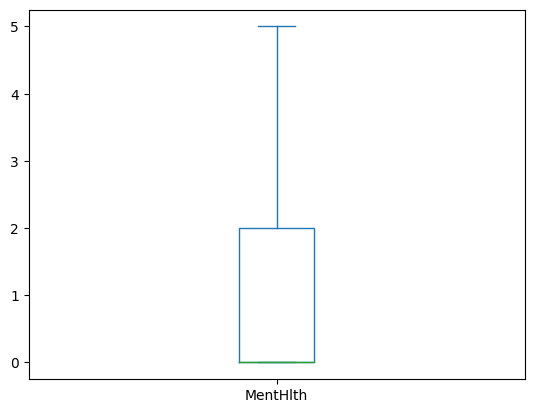

In [ ]:
data['MentHlth'].plot(kind='box')
plt.savefig('MentHlthAfterBP.png', dpi=300)

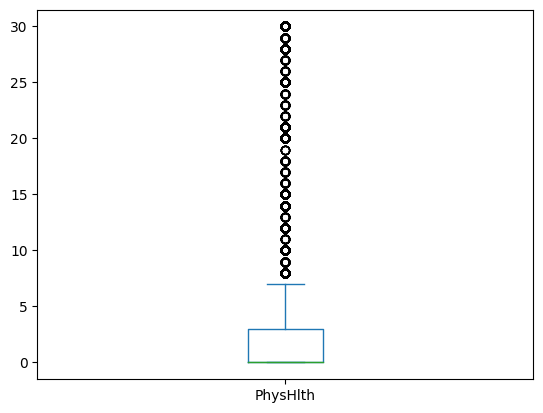

In [ ]:
data['PhysHlth'].plot(kind='box')
plt.savefig('PhysHlthBeforeBP.png', dpi=300)

In [ ]:
attribute_name = 'PhysHlth'

# Calculate the IQR for the attribute
Q1 = data[attribute_name].quantile(0.25)
Q3 = data[attribute_name].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = data[(data[attribute_name] < lower_bound) | (data[attribute_name] > upper_bound)]

# Print the number of outliers
print(f"Number of outliers in '{attribute_name}': {len(outliers)}")

# Print the number of Records
print("Number of Records:", data.shape)

Number of outliers in 'PhysHlth': 19190
Number of Records: (124695, 16)


In [ ]:
attribute_name = 'PhysHlth'
capping_value = 5  # Value to cap outliers

# Calculate the IQR for the attribute
Q1 = data[attribute_name].quantile(0.25)
Q3 = data[attribute_name].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers instead of dropping them
data[attribute_name] = data[attribute_name].clip(lower=None, upper=upper_bound)

# Replace values exceeding the upper bound with capping_value
data.loc[data[attribute_name] > capping_value, attribute_name] = capping_value

# Print the number of outliers
print(f"Number of outliers capped in '{attribute_name}': {len(outliers)}")

# Check the shape of the cleaned DataFrame
print("Shape of cleaned DataFrame:", data.shape)


Number of outliers capped in 'PhysHlth': 19190
Shape of cleaned DataFrame: (124695, 16)


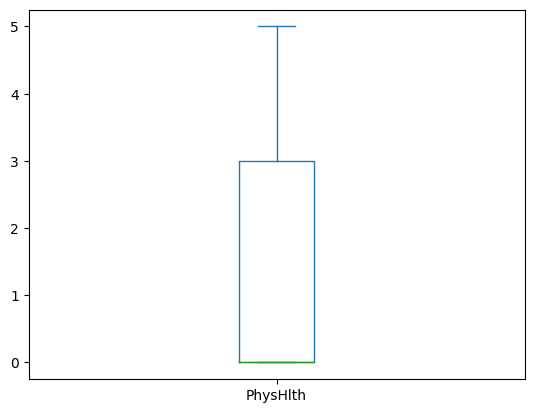

In [ ]:
data['PhysHlth'].plot(kind='box')
plt.savefig('PhysHlthAfterBP.png', dpi=300)

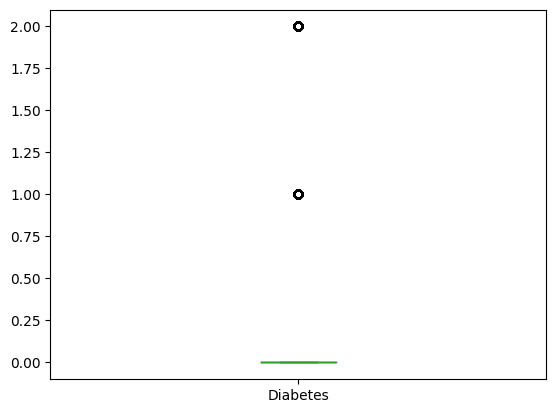

In [ ]:
data['Diabetes'].plot(kind='box')
plt.savefig('Diabetes.png', dpi=300)

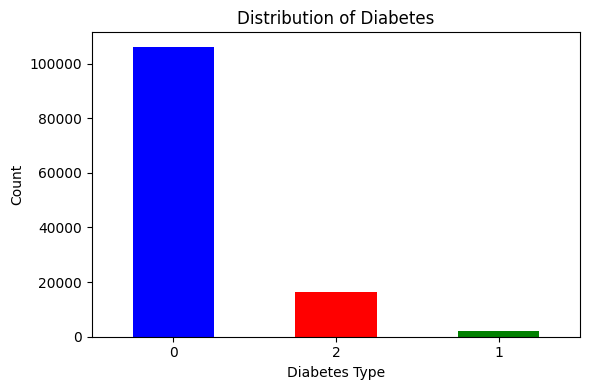

In [ ]:
diabetes_counts = data['Diabetes'].value_counts()

plt.figure(figsize=(6, 4))
diabetes_counts.plot(kind='bar', color=['blue', 'red','green'])
plt.title('Distribution of Diabetes')
plt.xlabel('Diabetes Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()

plt.savefig('diabetes_distribution.png', dpi=300)

plt.show()

<Axes: >

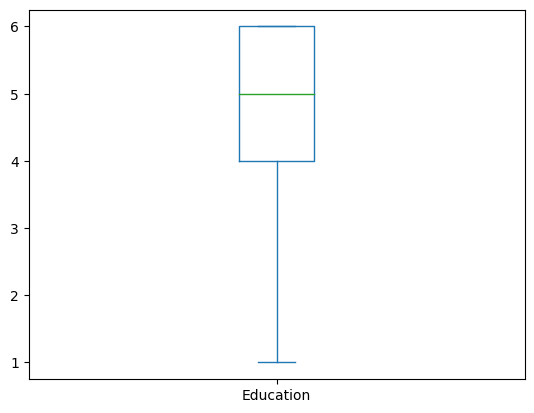

In [ ]:
data['Education'].plot(kind='box')

<Axes: >

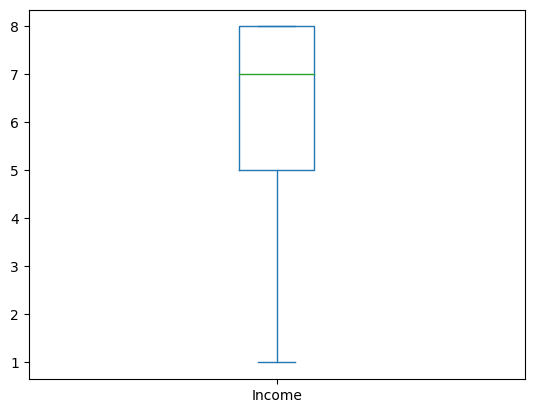

In [ ]:
data['Income'].plot(kind='box')

<Axes: >

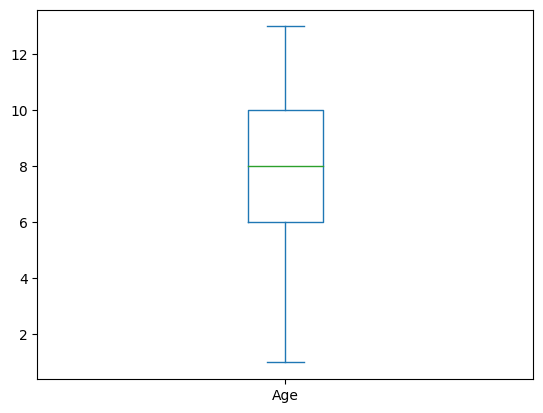

In [ ]:
data['Age'].plot(kind='box')

In [ ]:
data.dtypes

HeartDiseaseorAttack      int64
HighBP                    int64
HighChol                  int64
CholCheck                 int64
BMI                     float64
Smoker                    int64
Stroke                    int64
Diabetes                  int64
PhysActivity              int64
HvyAlcoholConsump         int64
MentHlth                  int64
PhysHlth                float64
Sex                       int64
Age                       int64
Education                 int64
Income                    int64
dtype: object

In [ ]:
data.shape

(124695, 16)

Since the number of missing values in the BMI is very small around 0.007% they will be dropped.

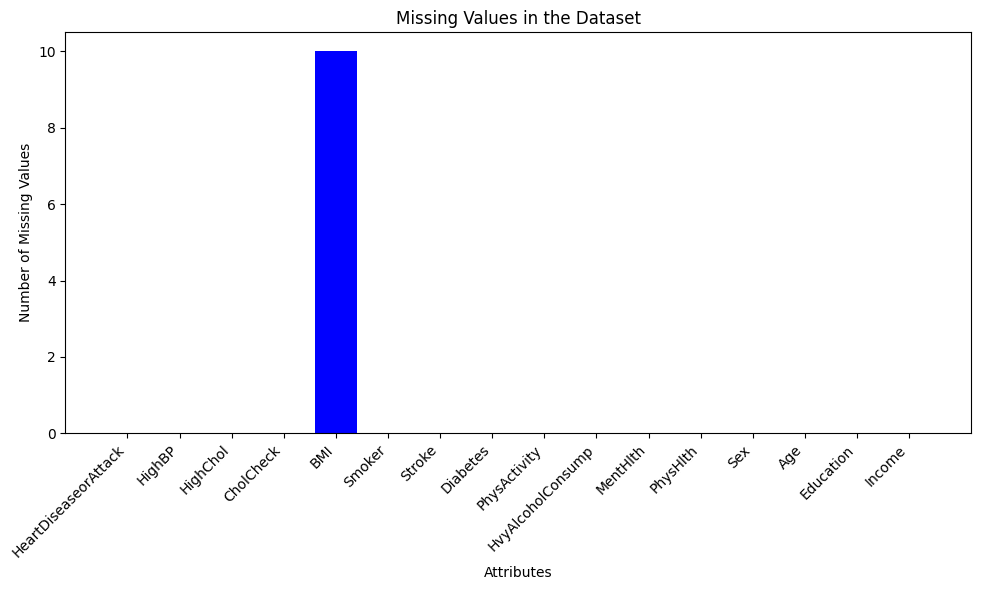

In [ ]:
missing_values = data.isnull().sum()

plt.figure(figsize=(10, 6))
plt.bar(missing_values.index, missing_values.values, color='blue')
plt.xlabel('Attributes')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values in the Dataset')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.savefig('missing_values_plot.png', dpi=300)
plt.show()

In [ ]:
data.dropna(inplace=True)

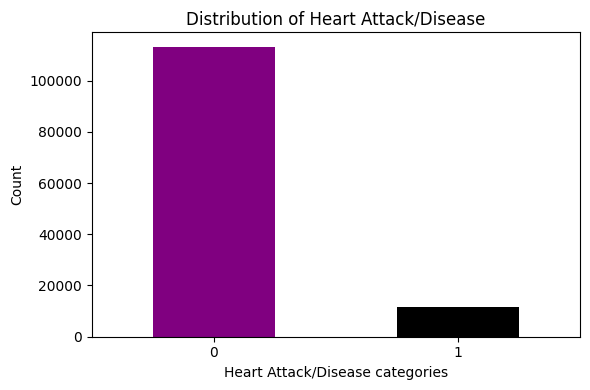

In [ ]:
heartAttack_counts = data['HeartDiseaseorAttack'].value_counts()

plt.figure(figsize=(6, 4))
heartAttack_counts.plot(kind='bar', color=['purple', 'black'])
plt.title('Distribution of Heart Attack/Disease')
plt.xlabel('Heart Attack/Disease categories')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()

plt.savefig('heartAttack_distributionBeforeSMOTE.png', dpi=300)

plt.show()

Split predictor and target and use smote to balance the data

In [ ]:
X = data.drop('HeartDiseaseorAttack', axis=1)
print('The values of the inputs are :',X)
y = data['HeartDiseaseorAttack']
print('The values of target are :',y)
oversample = SMOTE()
X_sm, y_sm = oversample.fit_resample(X, y)
transform = preprocessing.StandardScaler()
X_sm = transform.fit_transform(X_sm)
print('transformed', X_sm)

The values of the inputs are :         HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  Diabetes  \
0            1         1          1  40.0       1       0         0   
1            0         0          0  25.0       1       0         0   
2            1         1          1  28.0       0       0         0   
3            1         0          1  27.0       0       0         0   
4            1         1          1  24.0       0       0         0   
...        ...       ...        ...   ...     ...     ...       ...   
129993       1         1          1  25.0       1       0         0   
129994       0         0          1  27.0       0       0         0   
129995       0         0          1  29.0       0       0         0   
129996       0         0          0  21.0       0       0         0   
129997       0         0          1  21.0       1       0         0   

        PhysActivity  HvyAlcoholConsump  MentHlth  PhysHlth  Sex  Age  \
0                  0                  0    

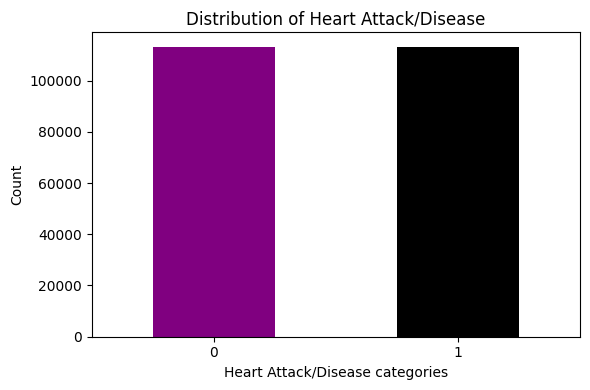

In [ ]:
heartAttackAS_counts = y_sm.value_counts()

plt.figure(figsize=(6, 4))
heartAttackAS_counts.plot(kind='bar', color=['purple', 'black'])
plt.title('Distribution of Heart Attack/Disease')
plt.xlabel('Heart Attack/Disease categories')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()

plt.savefig('heartAttack_distributionAfterSMOTE.png', dpi=300)

plt.show()

**KNN Model**

This below is experimental it can be removed and it will impact nothing

Results Table:
                                           params_str  mean_test_score  \
0    {'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}         0.830101   
1   {'n_neighbors': 1, 'p': 1, 'weights': 'distance'}         0.830101   
2    {'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}         0.827265   
3   {'n_neighbors': 1, 'p': 2, 'weights': 'distance'}         0.827265   
4   {'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}         0.783439   
5   {'n_neighbors': 10, 'p': 1, 'weights': 'distan...         0.821632   
6   {'n_neighbors': 10, 'p': 2, 'weights': 'uniform'}         0.776242   
7   {'n_neighbors': 10, 'p': 2, 'weights': 'distan...         0.816936   
8   {'n_neighbors': 20, 'p': 1, 'weights': 'uniform'}         0.768719   
9   {'n_neighbors': 20, 'p': 1, 'weights': 'distan...         0.816423   
10  {'n_neighbors': 20, 'p': 2, 'weights': 'uniform'}         0.762335   
11  {'n_neighbors': 20, 'p': 2, 'weights': 'distan...         0.811051   

    std_test_score  
0

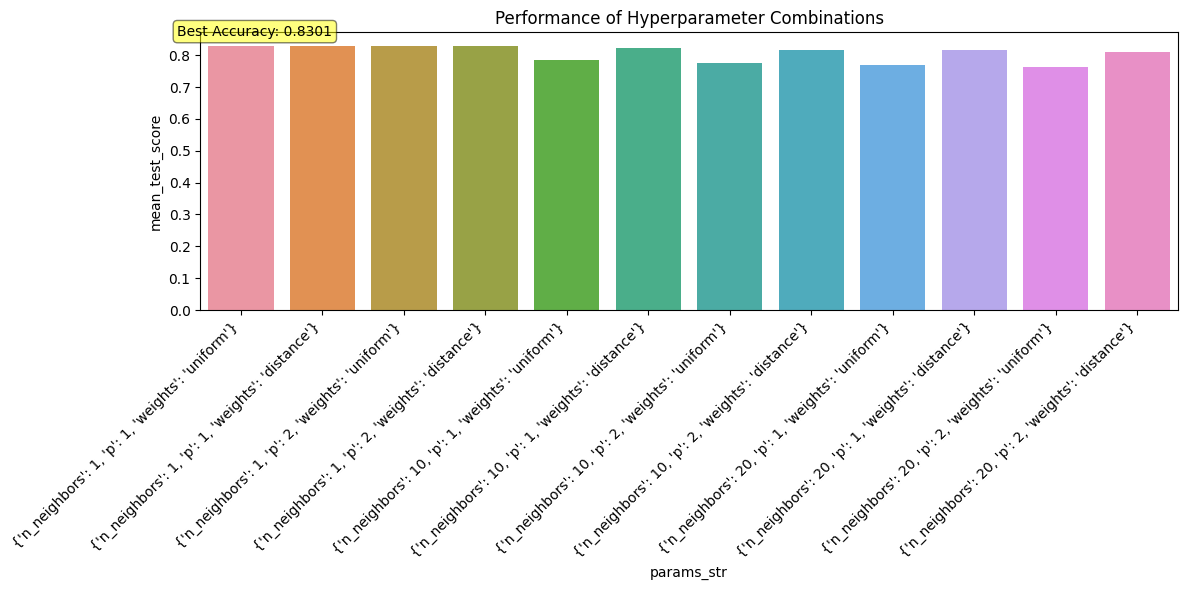


Best Parameters:  {'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
Best Accuracy: 0.8301


In [ ]:
from sklearn.model_selection import GridSearchCV
import pandas as pd

param_grid = {'n_neighbors': [1, 10, 20], 'weights': ['uniform', 'distance'], 'p': [1,2]}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=2, scoring='accuracy')
grid_search.fit(X_sm, y_sm)

# Access the results
results = pd.DataFrame(grid_search.cv_results_)

# Convert the 'params' column to strings
results['params_str'] = results['params'].astype(str)

# Print the table of results
print("Results Table:")
print(results[['params_str', 'mean_test_score', 'std_test_score']])

# Visualize the results
plt.figure(figsize=(12, 6))
sns.barplot(x='params_str', y='mean_test_score', data=results)
plt.title('Performance of Hyperparameter Combinations')
plt.xticks(rotation=45, ha='right')

# Highlight the best result
best_result_index = results['mean_test_score'].idxmax()
best_accuracy = results['mean_test_score'][best_result_index]
plt.annotate(f'Best Accuracy: {best_accuracy:.4f}',
             xy=(best_result_index, best_accuracy),
             xytext=(10, 5),
             textcoords='offset points',
             ha='center', va='bottom',
             bbox=dict(boxstyle='round,pad=0.3', fc='yellow', alpha=0.5))

# Adjust layout to prevent clipping of x-axis labels
plt.tight_layout()

# Save the figure in 300 dpi
plt.savefig('hyperparameter_performance.png', dpi=300)

# Show the plot
plt.show()

# Print the best parameters and their accuracy
best_params = grid_search.best_params_
print("\nBest Parameters: ", best_params)
print("Best Accuracy: {:.4f}".format(best_accuracy))


experiment with different number of neighbours

[0.8299330246695412, 0.8273618081572065, 0.8282321340213472, 0.8296723687000778, 0.826058528309889, 0.8271364953700431, 0.8242251007280695, 0.8247154873824839]


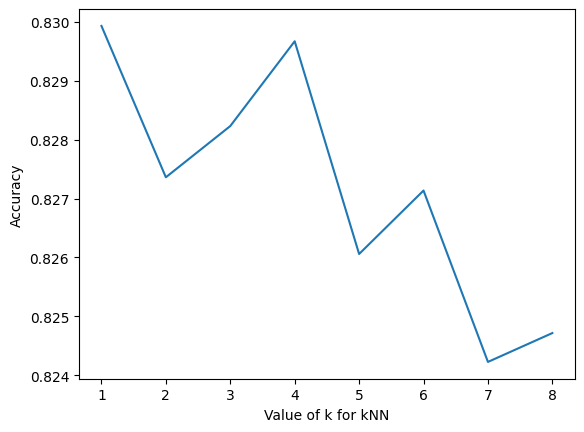

In [ ]:
k_range = range(1, 9)
scores = []

for k in k_range:
    kNN = KNeighborsClassifier(n_neighbors=k, weights='distance', p=1)
    score = cross_val_score(kNN, X_sm, y_sm, cv=2, scoring='accuracy')
    scores.append(score.mean())

print(scores)

plt.plot(k_range, scores)
plt.xlabel('Value of k for kNN')
plt.ylabel('Accuracy')

plt.savefig('kNN_accuracy_plot.png', dpi=300)
plt.show()


[0.77650645 0.8734317  0.87625359 0.85703556 0.86304396 0.86887564
 0.86229291 0.8738679  0.87294014 0.86056991]


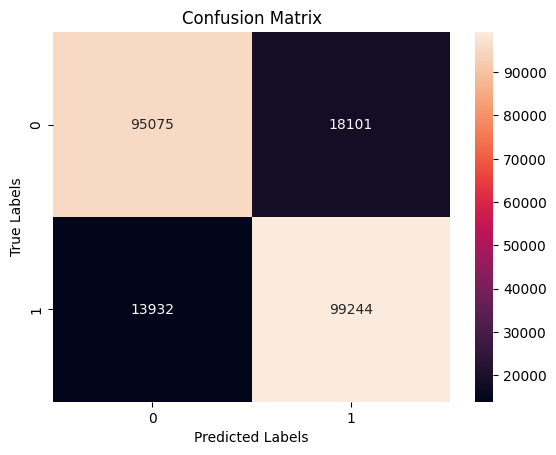

              precision    recall  f1-score   support

           0       0.87      0.84      0.86    113176
           1       0.85      0.88      0.86    113176

    accuracy                           0.86    226352
   macro avg       0.86      0.86      0.86    226352
weighted avg       0.86      0.86      0.86    226352

Accuracy: 0.8584814801724747


In [ ]:
Knn = KNeighborsClassifier(n_neighbors=1, weights='distance', p=1)
KnnScore = cross_val_score(Knn, X_sm, y_sm, cv=10)
print(KnnScore)
y_pred = cross_val_predict(Knn, X_sm, y_sm, cv=10)

conf_matrix = confusion_matrix(y_sm, y_pred)
heatmap = sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.savefig('confusion_matrix.png', dpi=300)
plt.show()

AccuracyKnncv = accuracy_score(y_sm, y_pred)
PrecisionKnncv = precision_score(y_sm, y_pred, average='weighted')
RecallKnncv = recall_score(y_sm, y_pred, average='weighted')
F1ScoreKnncv = f1_score(y_sm, y_pred, average='weighted')
models.append('KNeighbors')
Accuracy_score.append(AccuracyKnncv)
precision.append(PrecisionKnncv)
recall.append(RecallKnncv)
f1Score.append(F1ScoreKnncv)
print(classification_report(y_sm, y_pred))
print("Accuracy:", accuracy_score(y_sm, y_pred))

**Decision Tree Model**

Results Table:
               params_str  mean_test_score  std_test_score
0        gini, None, 1, 2         0.882073        0.037122
1        gini, None, 1, 5         0.874514        0.038097
2       gini, None, 1, 10         0.859900        0.036605
3        gini, None, 2, 2         0.864707        0.037553
4        gini, None, 2, 5         0.864044        0.037613
..                    ...              ...             ...
76   log_loss, log2, 2, 5         0.830075        0.029959
77  log_loss, log2, 2, 10         0.818800        0.027705
78   log_loss, log2, 4, 2         0.798880        0.026370
79   log_loss, log2, 4, 5         0.798694        0.025385
80  log_loss, log2, 4, 10         0.798571        0.025597

[81 rows x 3 columns]

Best Parameters:  log_loss, None, 1, 2
Best Accuracy: 0.8833


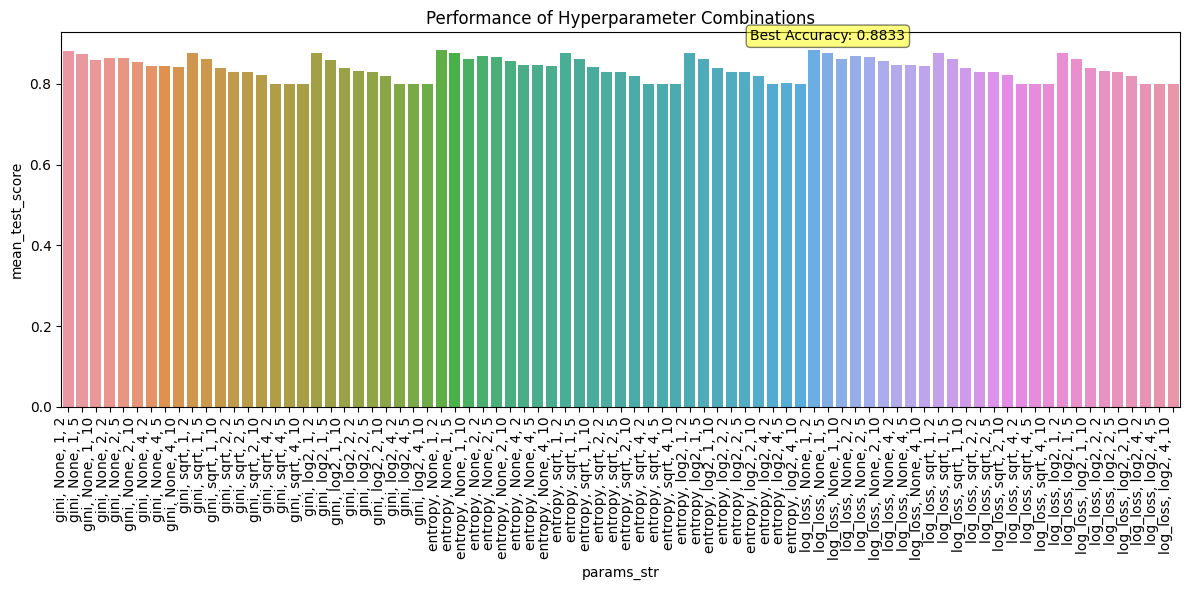

In [ ]:

# Define the parameter grid
param_grid = param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Create a Decision Tree classifier
dt = DecisionTreeClassifier()

# Perform GridSearchCV
grid_search = GridSearchCV(dt, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_sm, y_sm)

# Access the results
results = pd.DataFrame(grid_search.cv_results_)

# Convert the 'params' column to strings in a simplified format
results['params_str'] = results['params'].apply(lambda x: ', '.join(f'{val}' for val in x.values()))

# Print the table of results
print("Results Table:")
print(results[['params_str', 'mean_test_score', 'std_test_score']])

# Visualize the results
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='params_str', y='mean_test_score', data=results)
plt.title('Performance of Hyperparameter Combinations')
plt.xticks(rotation=90, ha='right')

# Highlight the best result
best_result_index = results['mean_test_score'].idxmax()
best_accuracy = results['mean_test_score'][best_result_index]
plt.annotate(f'Best Accuracy: {best_accuracy:.4f}',
             xy=(best_result_index, best_accuracy),
             xytext=(10, 5),
             textcoords='offset points',
             ha='center', va='bottom',
             bbox=dict(boxstyle='round,pad=0.3', fc='yellow', alpha=0.5))

# Print the best parameters and their accuracy
best_params = results['params_str'][best_result_index]
print("\nBest Parameters: ", best_params)
print("Best Accuracy: {:.4f}".format(best_accuracy))

#Save plot
plt.tight_layout()
plt.savefig('Decision_tree_grid_search_results.png', dpi=300)

# Show the plot
plt.show()

[0.76837781 0.90501855 0.90183344 0.88667992 0.88862381 0.89392534
 0.88849127 0.89922686 0.90227524 0.8895074 ]


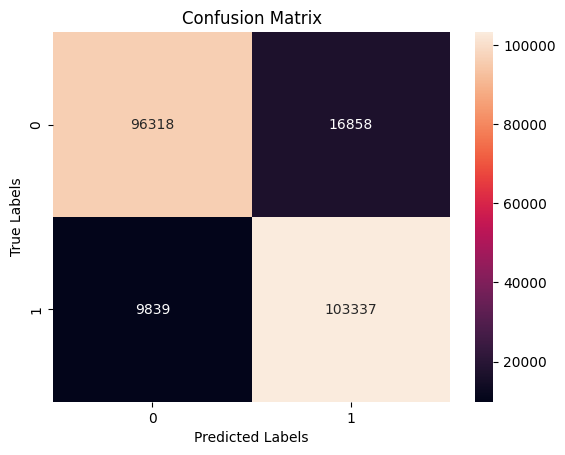

              precision    recall  f1-score   support

           0       0.91      0.85      0.88    113176
           1       0.86      0.91      0.89    113176

    accuracy                           0.88    226352
   macro avg       0.88      0.88      0.88    226352
weighted avg       0.88      0.88      0.88    226352

Accuracy: 0.8820553827666643


In [ ]:
DT = DecisionTreeClassifier(criterion='log_loss', max_features=None, min_samples_leaf=1, min_samples_split=2)
DTScore = cross_val_score(DT, X_sm, y_sm, cv=10)
print(DTScore)
y_pred = cross_val_predict(DT, X_sm, y_sm, cv=10)

conf_matrix = confusion_matrix(y_sm, y_pred)
heatmap = sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.savefig('confusion_matrix_decision_tree.png', dpi=300)

plt.show()

AccuracyDTcv = accuracy_score(y_sm, y_pred)
PrecisionDTcv = precision_score(y_sm, y_pred, average='weighted')
RecallDTcv = recall_score(y_sm, y_pred, average='weighted')
F1ScoreDTcv = f1_score(y_sm, y_pred, average='weighted')
models.append('Decision Tree')
Accuracy_score.append(AccuracyDTcv)
precision.append(PrecisionDTcv)
recall.append(RecallDTcv)
f1Score.append(F1ScoreDTcv)
print(classification_report(y_sm, y_pred))
print("Accuracy:", accuracy_score(y_sm, y_pred))

**Random Forest Model**

[0.81392472 0.92109913 0.92348133 0.90351226 0.9094323  0.91411531
 0.90753258 0.91791473 0.92118401 0.9092114 ]


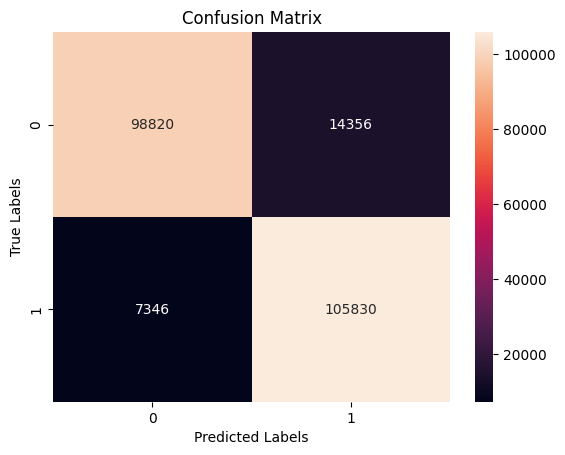

              precision    recall  f1-score   support

           0       0.93      0.87      0.90    113176
           1       0.88      0.94      0.91    113176

    accuracy                           0.90    226352
   macro avg       0.91      0.90      0.90    226352
weighted avg       0.91      0.90      0.90    226352

Accuracy: 0.9041227822153106


In [ ]:
Rf = RandomForestClassifier()
RfScore = cross_val_score(Rf, X_sm, y_sm, cv=10)
print(RfScore)
y_pred = cross_val_predict(Rf, X_sm, y_sm, cv=10)

conf_matrix = confusion_matrix(y_sm, y_pred)
heatmap = sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.savefig('confusion_matrix_random_forest.png', dpi=300)

plt.show()

AccuracyRFcv = accuracy_score(y_sm, y_pred)
PrecisionRFcv = precision_score(y_sm, y_pred, average='weighted')
RecallRFcv = recall_score(y_sm, y_pred, average='weighted')
F1ScoreRFcv = f1_score(y_sm, y_pred, average='weighted')
models.append('Random Forest')
Accuracy_score.append(AccuracyRFcv)
precision.append(PrecisionRFcv)
recall.append(RecallRFcv)
f1Score.append(F1ScoreRFcv)
print(classification_report(y_sm, y_pred))
print("Accuracy:", accuracy_score(y_sm, y_pred))

**ANN Model**

Say that you experimented with a different number of layers,neurons and learning rate

Epoch 1/100
4527/4527 [==============================] - 86s 19ms/step - loss: 0.5251 - accuracy: 0.7428 - val_loss: 0.5129 - val_accuracy: 0.7496
Epoch 2/100
4527/4527 [==============================] - 87s 19ms/step - loss: 0.5177 - accuracy: 0.7474 - val_loss: 0.5109 - val_accuracy: 0.7501
Epoch 3/100
4527/4527 [==============================] - 82s 18ms/step - loss: 0.5122 - accuracy: 0.7506 - val_loss: 0.5067 - val_accuracy: 0.7508
Epoch 4/100
4527/4527 [==============================] - 82s 18ms/step - loss: 0.5069 - accuracy: 0.7545 - val_loss: 0.5024 - val_accuracy: 0.7567
Epoch 5/100
4527/4527 [==============================] - 84s 19ms/step - loss: 0.5013 - accuracy: 0.7593 - val_loss: 0.4958 - val_accuracy: 0.7613
Epoch 6/100
4527/4527 [==============================] - 84s 19ms/step - loss: 0.4959 - accuracy: 0.7634 - val_loss: 0.4963 - val_accuracy: 0.7662
Epoch 7/100
4527/4527 [==============================] - 84s 18ms/step - loss: 0.4894 - accuracy: 0.7672 - val_loss: 0

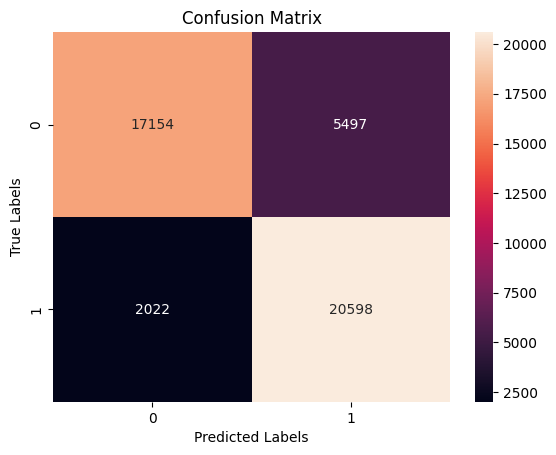

              precision    recall  f1-score   support

           0       0.89      0.76      0.82     22651
           1       0.79      0.91      0.85     22620

    accuracy                           0.83     45271
   macro avg       0.84      0.83      0.83     45271
weighted avg       0.84      0.83      0.83     45271



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

# Scale input features
scaler = StandardScaler()
X_sm_scaled = scaler.fit_transform(X_sm)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_sm_scaled, y_sm, test_size=0.2, random_state=0)

num_features = X_train.shape[1]
num_classes = len(set(y_sm))

# Define your model
model = Sequential()
model.add(Dense(350, activation='relu', input_dim=num_features))
model.add(Dropout(0.05))
model.add(Dense(400, activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(450, activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(560, activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit the model
model.fit(x=X_train, y=y_train, epochs=100, validation_split=0.2)

# Predict on the test set
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Create confusion matrix plot
conf_matrix = confusion_matrix(y_test, y_pred)
heatmap = sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Save the confusion matrix plot in 300 dpi
plt.savefig('confusion_matrix_keras.png', dpi=300)

# Show the plot
plt.show()

# Evaluate the model
print(classification_report(y_test, y_pred))


In [ ]:
AccuracyAnn = accuracy_score(y_test, y_pred)
PrecisionAnn = precision_score(y_test, y_pred, average='weighted')
RecallAnn = recall_score(y_test, y_pred, average='weighted')
F1ScoreAnn = f1_score(y_test, y_pred, average='weighted')
models.append('ANN')
Accuracy_score.append(AccuracyAnn)
precision.append(PrecisionAnn)
recall.append(RecallAnn)
f1Score.append(F1ScoreAnn)

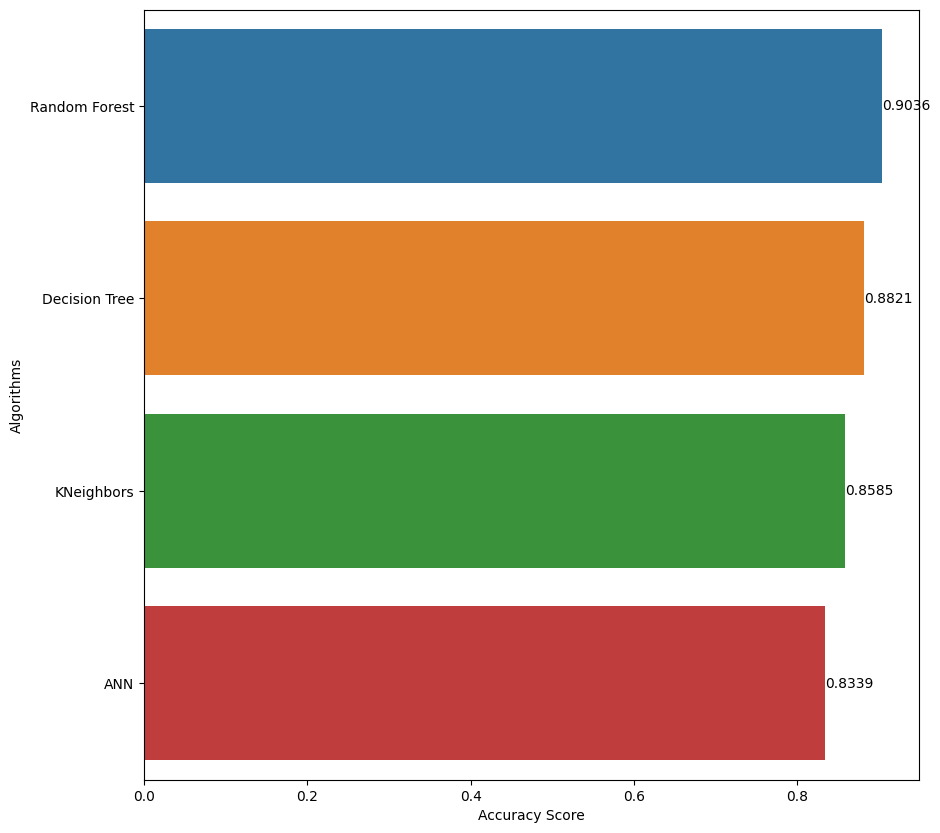

In [ ]:
compare_models = pd.DataFrame({'Algorithms': models, 'Precision': precision, 'Recall': recall, 'F1 Score': f1Score, 'Accuracy Score': Accuracy_score})
compare_models = compare_models.sort_values(by='Accuracy Score', ascending=False).reset_index(drop=True)

plt.figure(figsize=(10, 10))
barplot = sns.barplot(x='Accuracy Score', y='Algorithms', data=compare_models)

for index, value in enumerate(compare_models['Accuracy Score']):
    barplot.text(value, index, f'{value:.4f}', ha='left', va='center', fontsize=10, color='black')

plt.savefig('accuracy_comparison_plot.png', dpi=300)

plt.show()


Ways to improve accuraccy, smote, remove features, tune hyperparameters gradient boosting classifier

Upload the report not in as zip folder as it doesn't understand the extension.

Random Forest Improvement 1(More folds)

[0.82169995 0.81666372 0.92286623 0.92675384 0.92640042 0.92551688
 0.90660894 0.90855275 0.91332391 0.91129175 0.91146846 0.92551688
 0.91358134 0.9049218  0.92082707 0.92268269 0.92374304 0.92232924
 0.91870637 0.90509852]


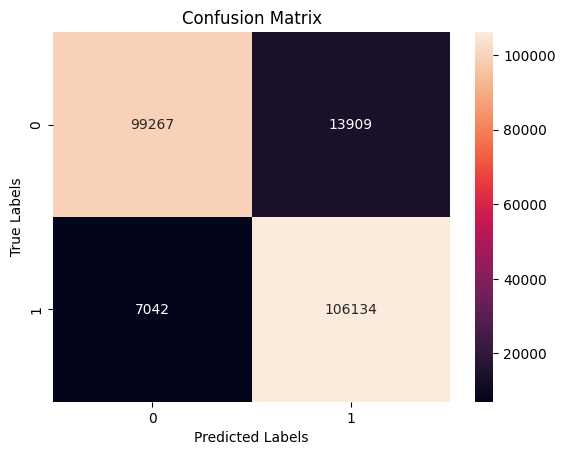

              precision    recall  f1-score   support

           0       0.93      0.88      0.90    113176
           1       0.88      0.94      0.91    113176

    accuracy                           0.91    226352
   macro avg       0.91      0.91      0.91    226352
weighted avg       0.91      0.91      0.91    226352

Accuracy: 0.9074406234537358


In [ ]:
Rf = RandomForestClassifier()
RfScore = cross_val_score(Rf, X_sm, y_sm, cv=20)
print(RfScore)
y_pred = cross_val_predict(Rf, X_sm, y_sm, cv=20)

conf_matrix = confusion_matrix(y_sm, y_pred)
heatmap = sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.savefig('confusion_matrix_random_forest_first_improvement.png', dpi=300)

plt.show()

AccuracyRFcv = accuracy_score(y_sm, y_pred)
PrecisionRFcv = precision_score(y_sm, y_pred, average='weighted')
RecallRFcv = recall_score(y_sm, y_pred, average='weighted')
F1ScoreRFcv = f1_score(y_sm, y_pred, average='weighted')
models.append('Random Forest')
Accuracy_score.append(AccuracyRFcv)
precision.append(PrecisionRFcv)
recall.append(RecallRFcv)
f1Score.append(F1ScoreRFcv)
print(classification_report(y_sm, y_pred))
print("Accuracy:", accuracy_score(y_sm, y_pred))

Random Forest Improvement 2(HyperParameter Tuning)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a RandomForestClassifier
rf = RandomForestClassifier()

# Perform GridSearchCV
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_sm, y_sm)

# Access the best parameters
best_params = grid_search.best_params_
print("Best Parameters: ", best_params)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Use the best model for predictions
y_pred = cross_val_predict(best_rf_model, X_sm, y_sm, cv=10)



Best Parameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


[0.81600106 0.92344054 0.92445328 0.90466092 0.90801856 0.91663353
 0.90426331 0.91574994 0.91994698 0.90982991]


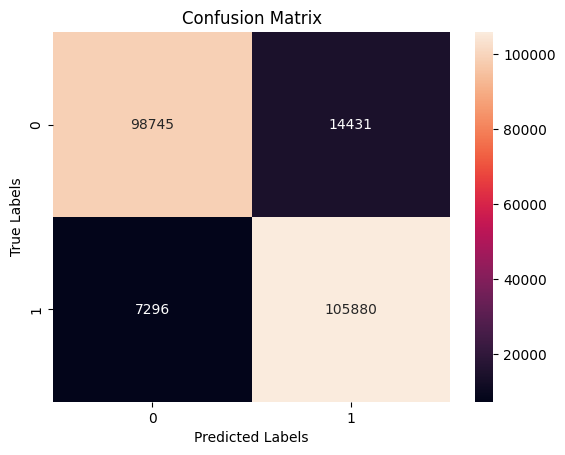

              precision    recall  f1-score   support

           0       0.93      0.87      0.90    113176
           1       0.88      0.94      0.91    113176

    accuracy                           0.90    226352
   macro avg       0.91      0.90      0.90    226352
weighted avg       0.91      0.90      0.90    226352

Accuracy: 0.9040123347706227


In [ ]:
Rf = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200)
RfScore = cross_val_score(Rf, X_sm, y_sm, cv=10)
print(RfScore)
y_pred = cross_val_predict(Rf, X_sm, y_sm, cv=10)

conf_matrix = confusion_matrix(y_sm, y_pred)
heatmap = sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.savefig('confusion_matrix_random_forest_second_improvement.png', dpi=300)

plt.show()

AccuracyRFcv = accuracy_score(y_sm, y_pred)
PrecisionRFcv = precision_score(y_sm, y_pred, average='weighted')
RecallRFcv = recall_score(y_sm, y_pred, average='weighted')
F1ScoreRFcv = f1_score(y_sm, y_pred, average='weighted')
models.append('Random Forest')
Accuracy_score.append(AccuracyRFcv)
precision.append(PrecisionRFcv)
recall.append(RecallRFcv)
f1Score.append(F1ScoreRFcv)
print(classification_report(y_sm, y_pred))
print("Accuracy:", accuracy_score(y_sm, y_pred))